In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.manifold import TSNE
import gc

# Estilo
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'figure.dpi': 150,
    'savefig.dpi': 300
})

# Caminhos
BASE_DIR = Path("/Users/lucasborges/Downloads/TCC")
SUPER_EMB_PATH = BASE_DIR / "graphs/super_item_item/super_embeddings_mean.parquet"
LOGS_PATH = BASE_DIR / "reports/metrics/training_logs.parquet"
OUT_FIG_DIR = BASE_DIR / "reports/figures"
OUT_FIG_DIR.mkdir(parents=True, exist_ok=True)

print("Setup concluido.")

Setup concluido.


Gerando: Learning Curves...
   4 pontos | Loss final: 0.4028 | Acc final: 93.27%
   Salvo em: /Users/lucasborges/Downloads/TCC/reports/figures/learning_curves.png


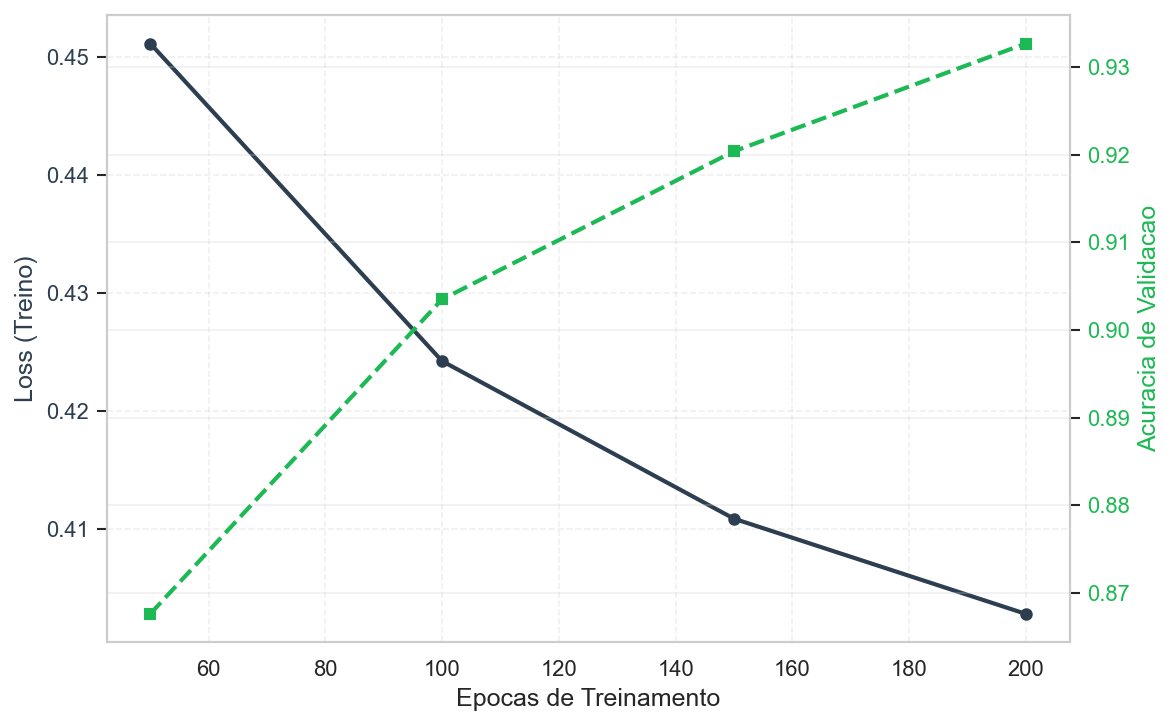

In [11]:
# ==============================================================================
# FIGURA 1: Learning Curves
# ==============================================================================

def plot_learning_curves(save_name="learning_curves.png"):
    """Curvas de aprendizado (Loss e Validation Accuracy)."""
    print("Gerando: Learning Curves...")
    
    if not LOGS_PATH.exists():
        print(f"   Arquivo nao encontrado: {LOGS_PATH}")
        return
    
    df = pd.read_parquet(LOGS_PATH)
    epochs = df['epoch'].tolist()
    loss = df['loss'].tolist()
    val_acc = df['ranking_acc'].tolist()
    
    print(f"   {len(epochs)} pontos | Loss final: {loss[-1]:.4f} | Acc final: {val_acc[-1]*100:.2f}%")
    
    fig, ax1 = plt.subplots(figsize=(8, 5))
    
    ax1.set_xlabel('Epocas de Treinamento')
    ax1.set_ylabel('Loss (Treino)', color="#2C3E50")
    ax1.plot(epochs, loss, color="#2C3E50", marker='o', markersize=5, linewidth=2)
    ax1.tick_params(axis='y', labelcolor="#2C3E50")
    ax1.grid(True, alpha=0.3, linestyle='--')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Acuracia de Validacao', color="#1DB954")
    ax2.plot(epochs, val_acc, color="#1DB954", marker='s', markersize=5, linestyle='--', linewidth=2)
    ax2.tick_params(axis='y', labelcolor="#1DB954")
    
    plt.tight_layout()
    plt.savefig(OUT_FIG_DIR / save_name, dpi=300, bbox_inches='tight')
    print(f"   Salvo em: {OUT_FIG_DIR / save_name}")
    plt.show()

plot_learning_curves()

Gerando: t-SNE dos Super-Nos...
   5,000 pontos de 20,641
   Executando t-SNE...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


   Salvo em: /Users/lucasborges/Downloads/TCC/reports/figures/tsne_supernodes.png


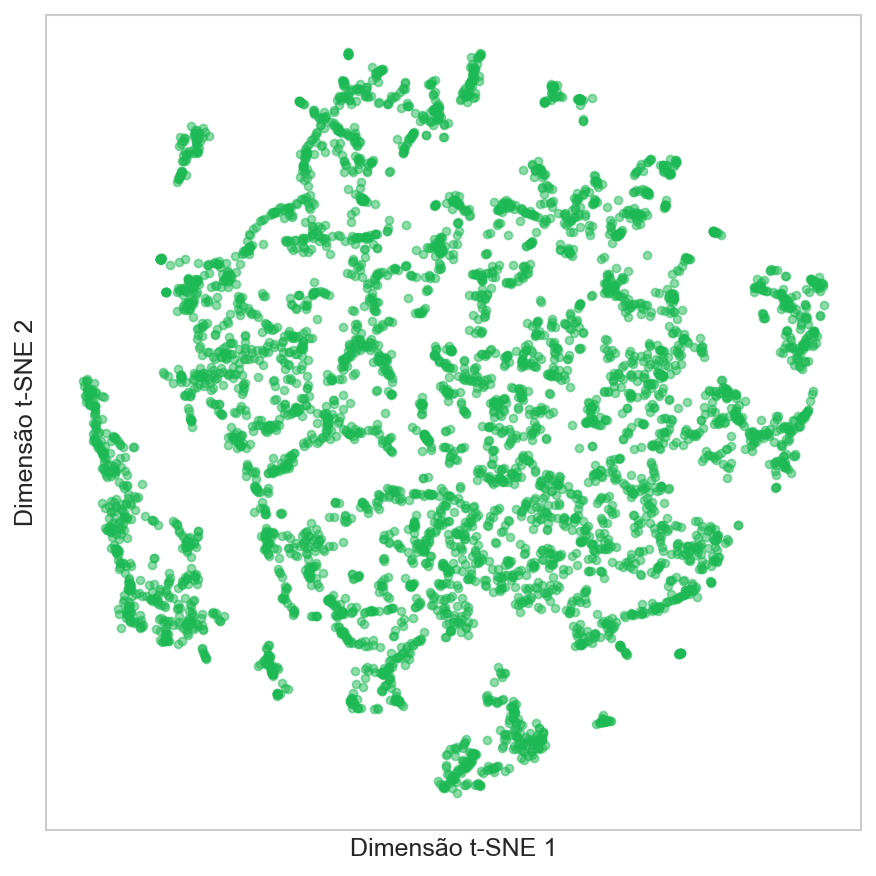

In [18]:
# ==============================================================================
# FIGURA 2: t-SNE dos Super-Nos
# ==============================================================================

def plot_tsne_supernodes(n_samples=5000, save_name="tsne_supernodes.png"):
    """Projecao t-SNE dos embeddings dos super-nos."""
    print("Gerando: t-SNE dos Super-Nos...")
    
    if not SUPER_EMB_PATH.exists():
        print(f"   Arquivo nao encontrado: {SUPER_EMB_PATH}")
        return
    
    # Carregar embeddings
    df_emb = pd.read_parquet(SUPER_EMB_PATH)
    emb_cols = [c for c in df_emb.columns if c.startswith("emb_mean_")]
    Z = df_emb[emb_cols].to_numpy(dtype=np.float32)
    
    # Amostragem
    n_samples = min(n_samples, len(Z))
    np.random.seed(42)
    indices = np.random.choice(len(Z), n_samples, replace=False)
    Z_sample = Z[indices]
    print(f"   {n_samples:,} pontos de {len(Z):,}")
    
    # Liberar memoria
    del Z, df_emb
    gc.collect()
    
    # t-SNE
    print("   Executando t-SNE...")
    tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42, init='pca')
    Z_2d = tsne.fit_transform(Z_sample)
    
    # Plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(Z_2d[:, 0], Z_2d[:, 1], c="#1DB954", s=15, alpha=0.5)
    ax.set_xlabel("Dimensão t-SNE 1")
    ax.set_ylabel("Dimensão t-SNE 2")
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.tight_layout()
    plt.savefig(OUT_FIG_DIR / save_name, dpi=300, bbox_inches='tight')
    print(f"   Salvo em: {OUT_FIG_DIR / save_name}")
    plt.show()

plot_tsne_supernodes()